In [102]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


from sklearn.model_selection import train_test_split


from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from joblib import dump

In [139]:
# loading in the data
df = pd.read_csv('RTA Dataset.csv')

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">EDA</h1>
</div>



In [104]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [105]:
#dimensions of the data set (we can see there are 32 columns and more than 12k rows) 
df.shape

(12316, 32)

In [106]:
# note that accident_severity is the target variable 
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [108]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in Time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique value in Day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique value in Age_band_of_driver:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique value in Sex_of_driver:
['Male' 'Female' 'Unknown'] 

Unique value in Educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique value in Vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique value in Driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique value in Type_of_vehicle:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

In [109]:
df['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

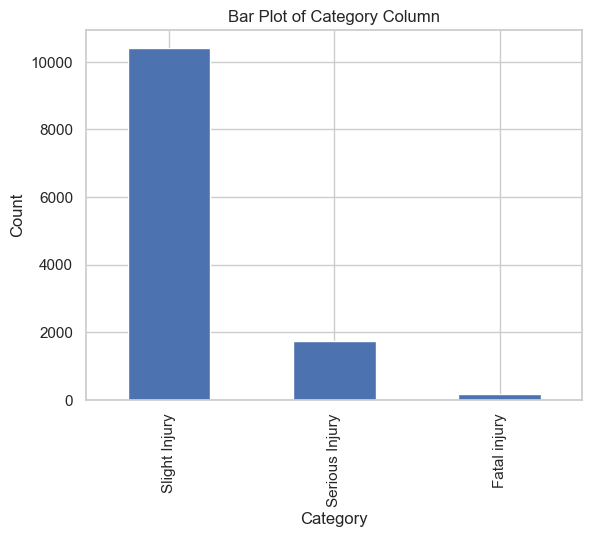

In [110]:
# checking out the target column in more detail
# note that we can see that the data set is heavily imbalanced 
df['Accident_severity'].value_counts().plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Category Column')
plt.show()



<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Missing Values and Duplicates</p>
</div>


In [111]:
# check for duplicates
df.duplicated().sum()

0

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <p style="color: black;">There are no duplicates in the data set</p>
</div>

<AxesSubplot: >

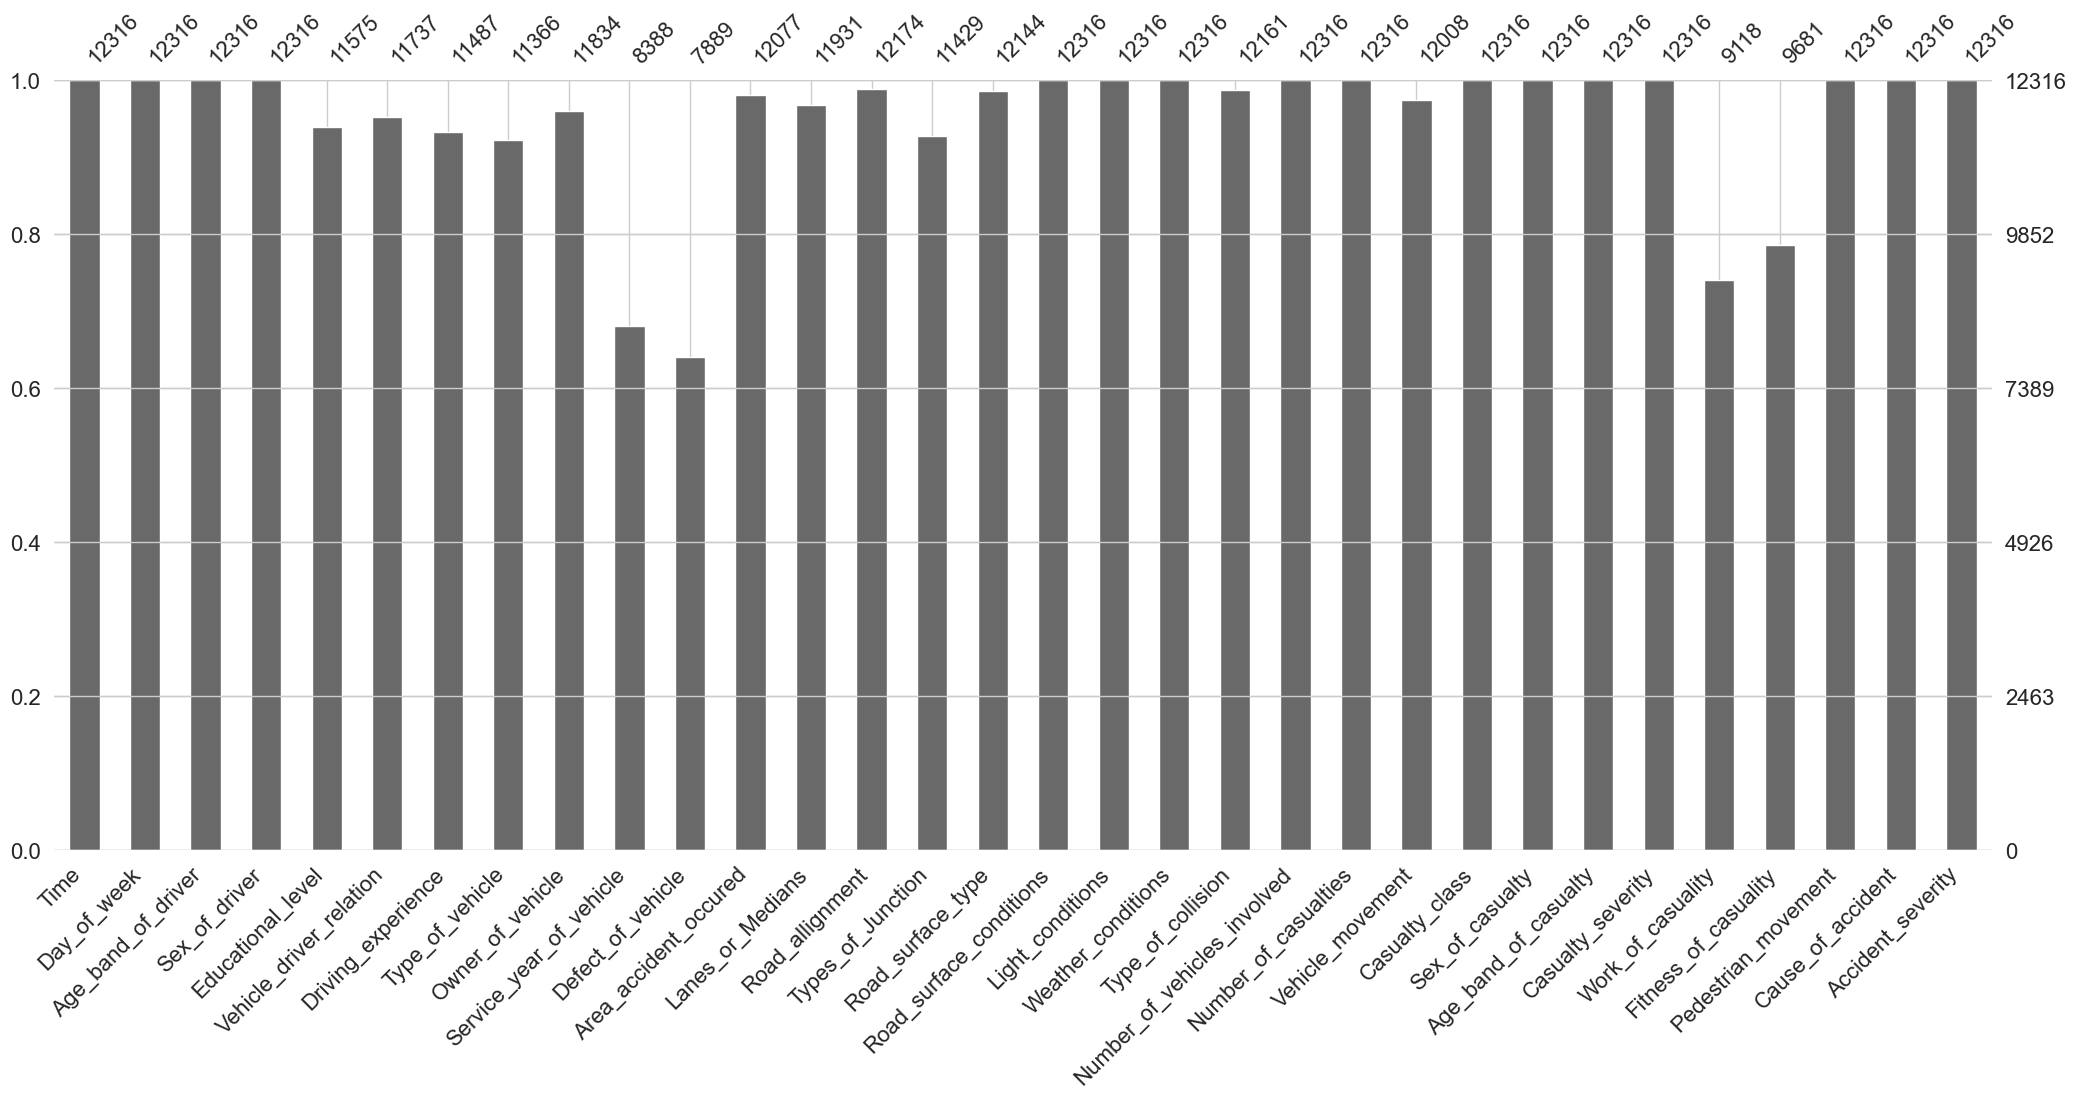

In [112]:
# we can see that some columns do have missing values but we're not missing anything more than 40% per column 
msno.bar(df)

In [113]:
# let's try to approximately quantify the amount of missing data for each column 
missing_values = df.isnull().sum()
percentage = (missing_values*100)/len(df)
missing_data_df = pd.concat([missing_values,percentage],axis=1)
missing_data_df.rename(columns={0: 'missing_data_points', 1: 'percentage of missing data'}, inplace=True)
missing_data_df[missing_data_df['missing_data_points']>0].sort_values(by='percentage of missing data', ascending=False)


,missing_data_points,percentage of missing data
Defect_of_vehicle,4427,35.945112
Service_year_of_vehicle,3928,31.893472
Work_of_casuality,3198,25.966223
Fitness_of_casuality,2635,21.394933
Type_of_vehicle,950,7.713543
Types_of_Junction,887,7.202014
Driving_experience,829,6.731082
Educational_level,741,6.016564
Vehicle_driver_relation,579,4.701202
Owner_of_vehicle,482,3.913608


<AxesSubplot: >

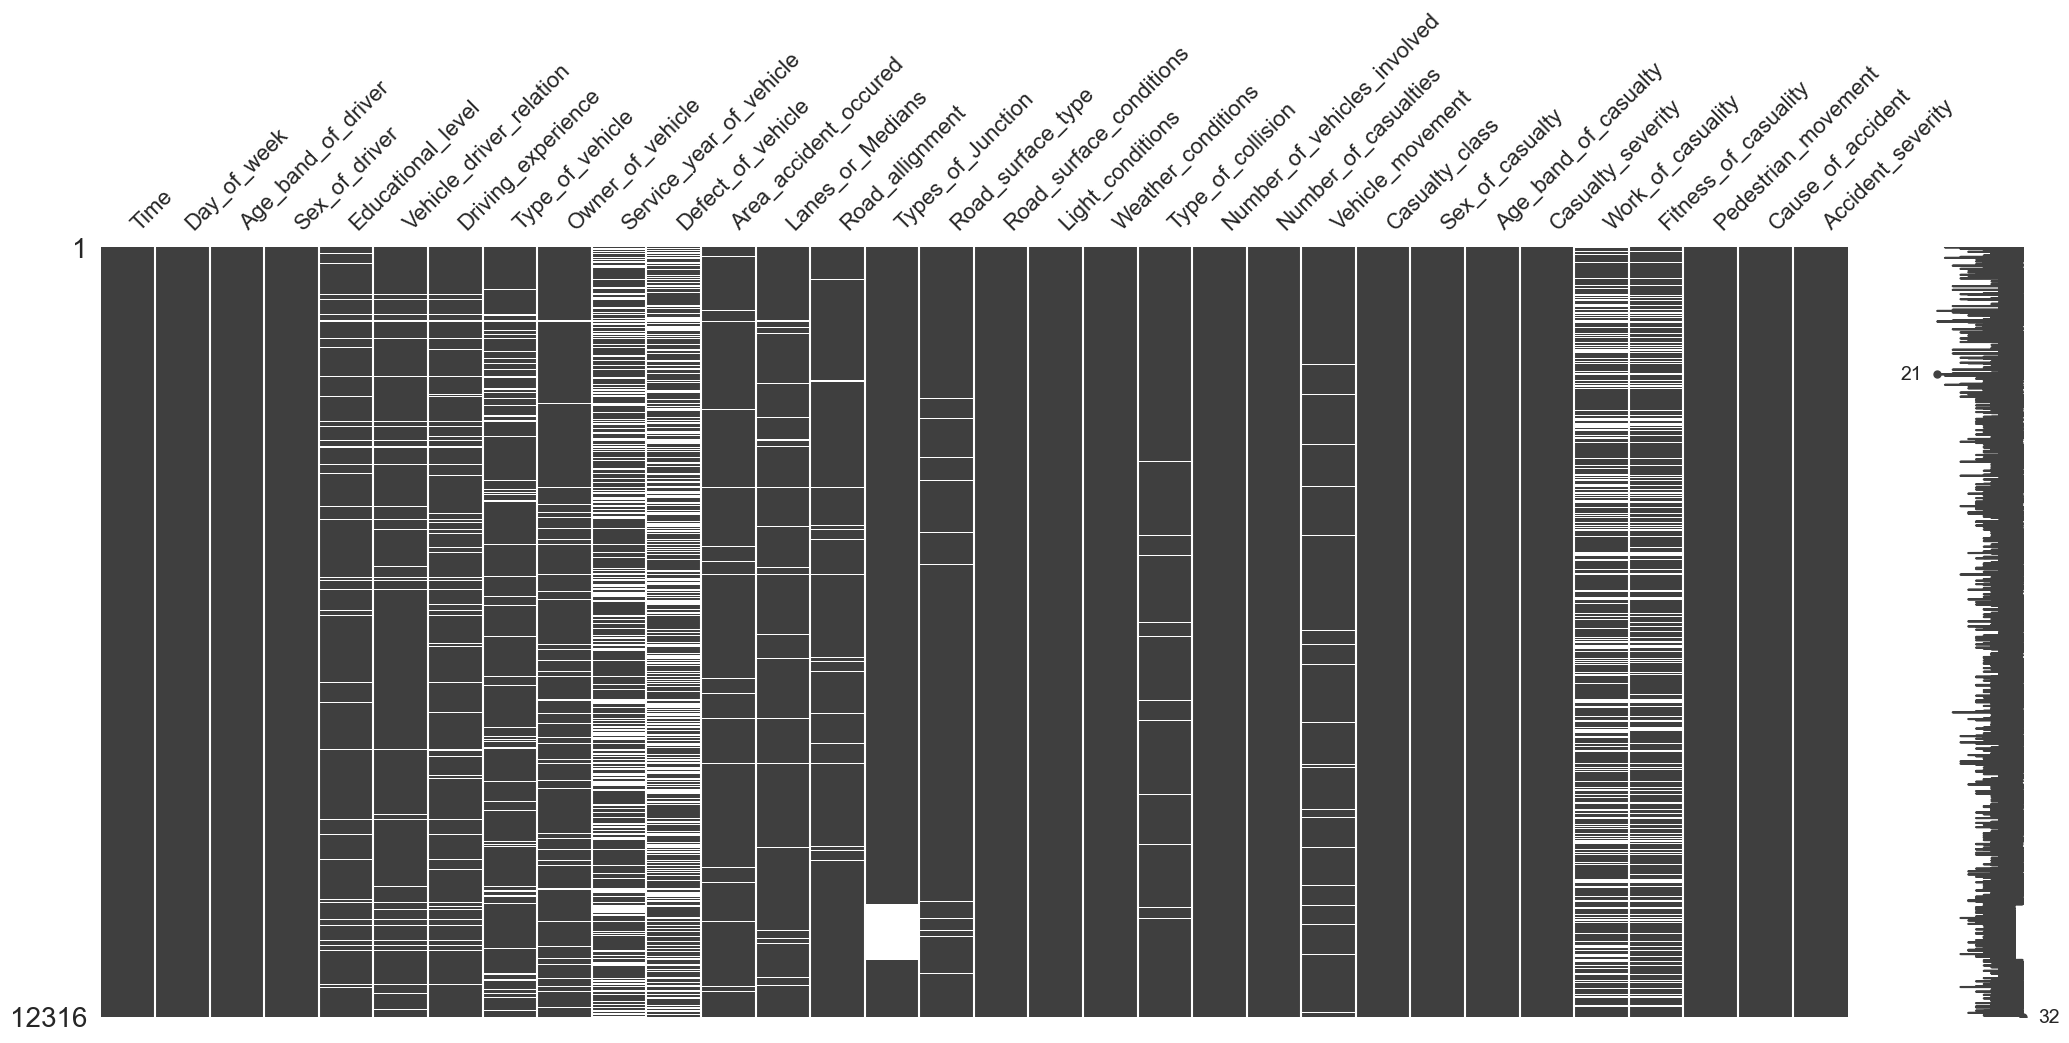

In [114]:
# we can use the matrix in the msno library to visualize where the missing data is within the columns
msno.matrix(df)

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <p style="color: black;">Now we will try to see if we can find any patterns or correlation between the missing data</p>
</div>


<AxesSubplot: >

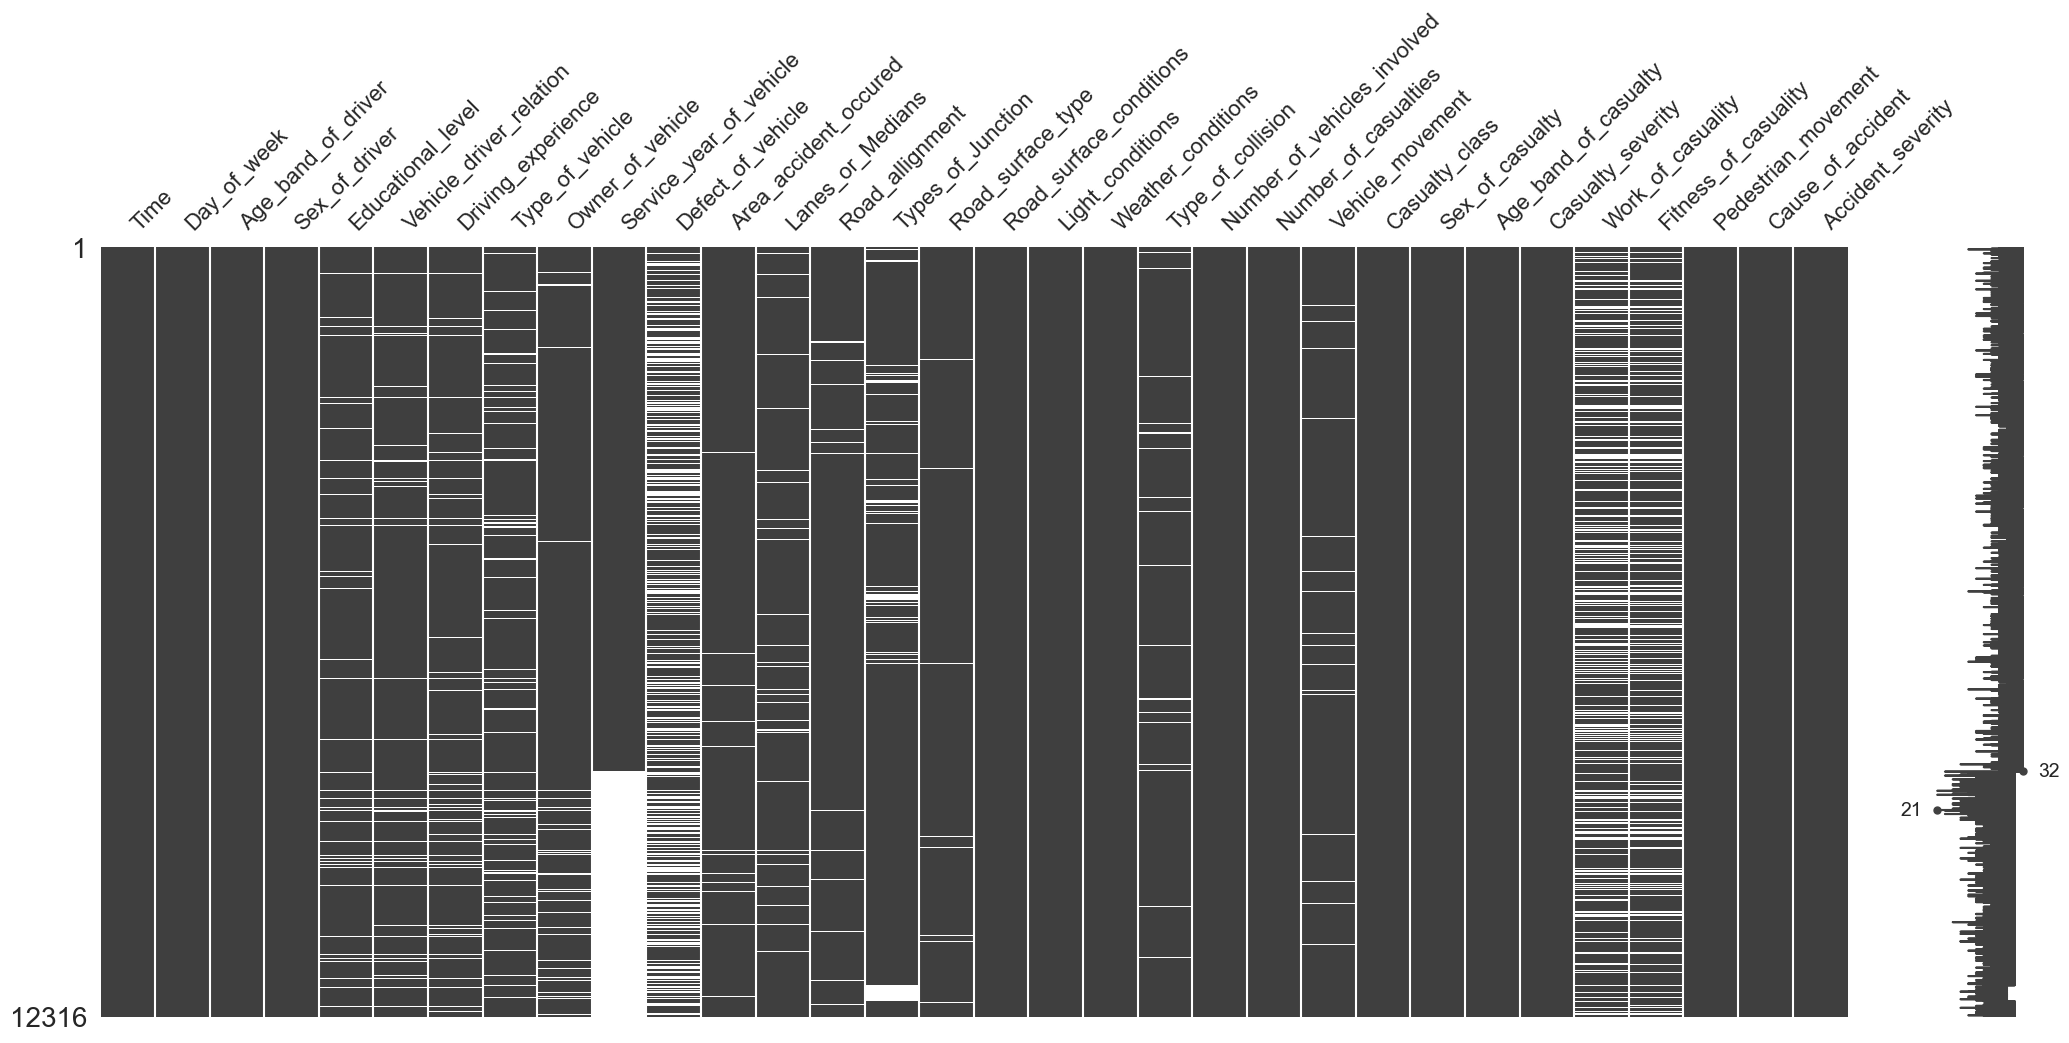

In [115]:
# there seems to be no correlation whatsoever between the missing data when we order it by the service year of the vehicle 
msno.matrix(df.sort_values('Service_year_of_vehicle'))

<AxesSubplot: >

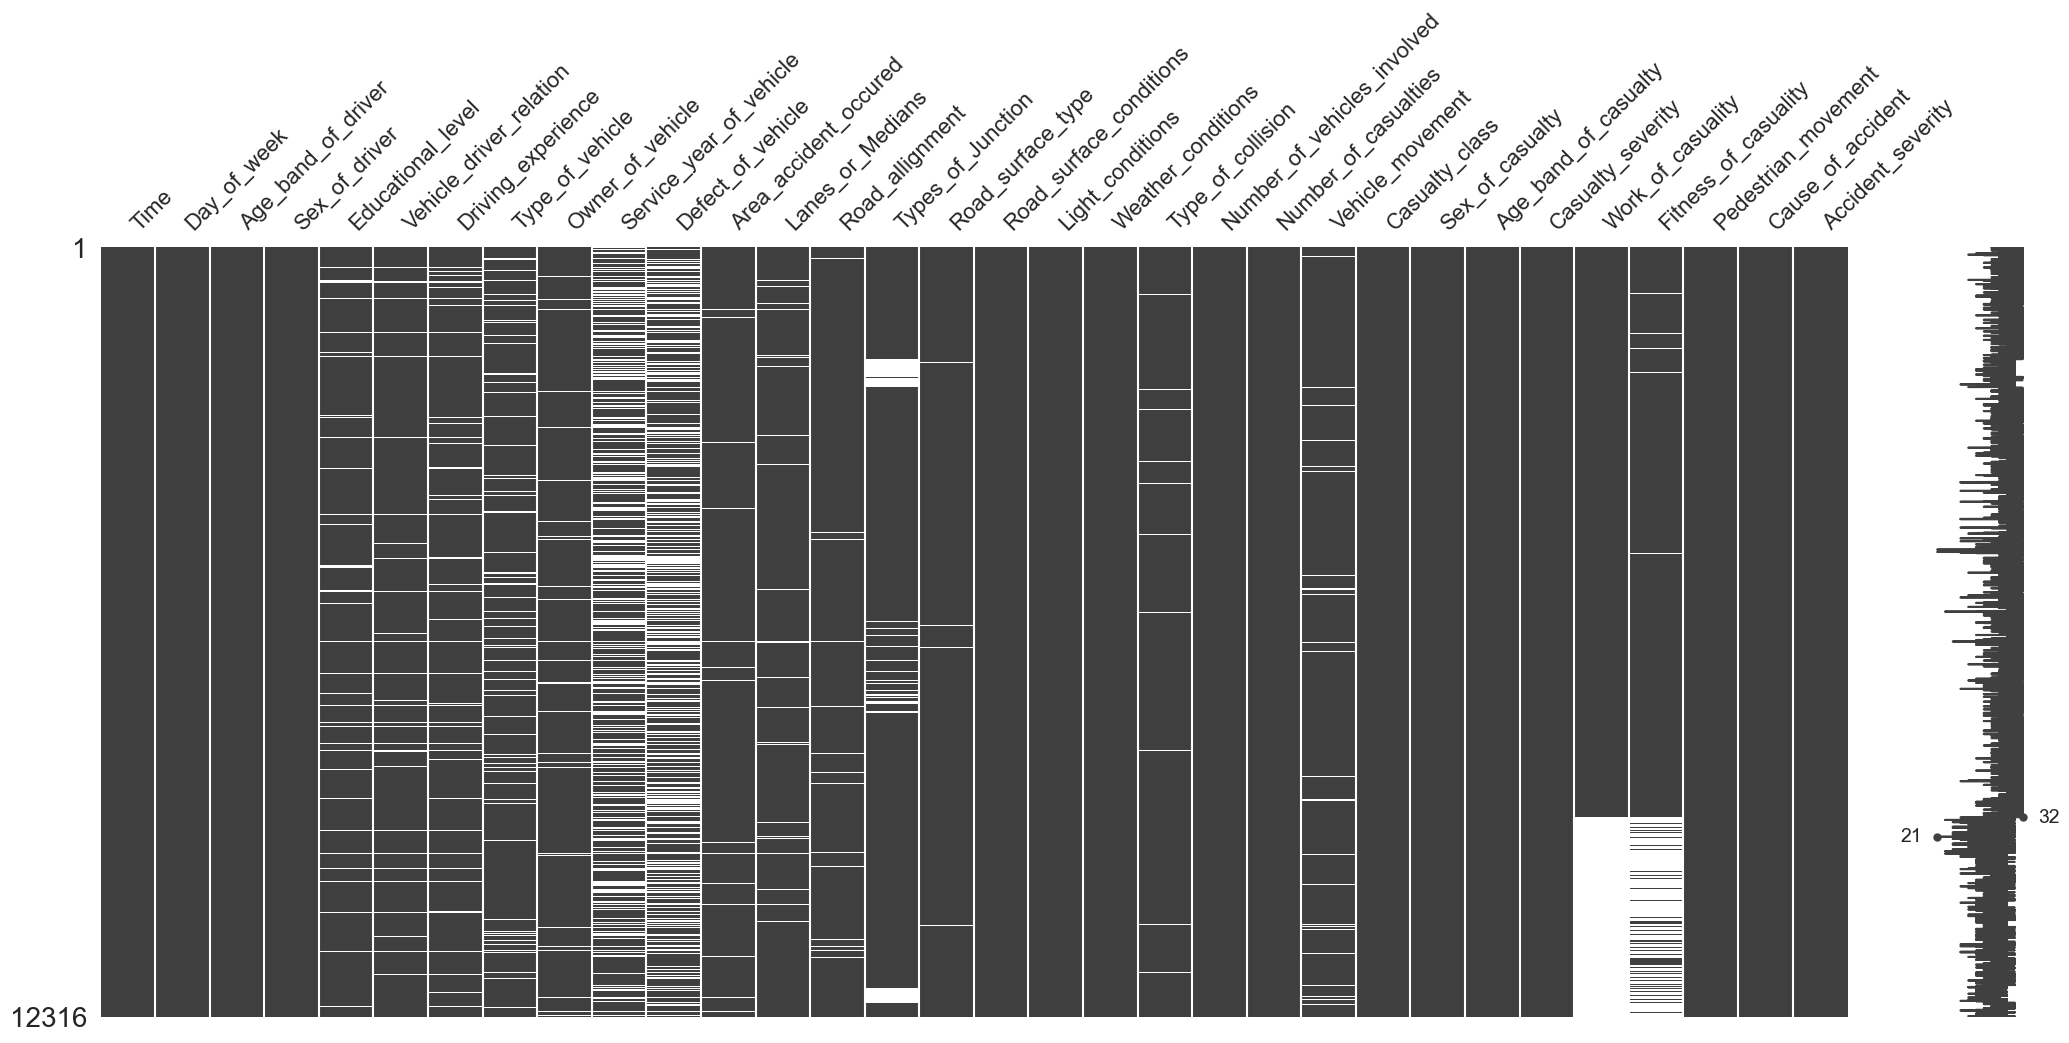

In [116]:
# however, there is a clear correlation between the missing data in columns work_of_casuality and fitness_of_casualty 
msno.matrix(df.sort_values('Work_of_casuality'))

<AxesSubplot: >

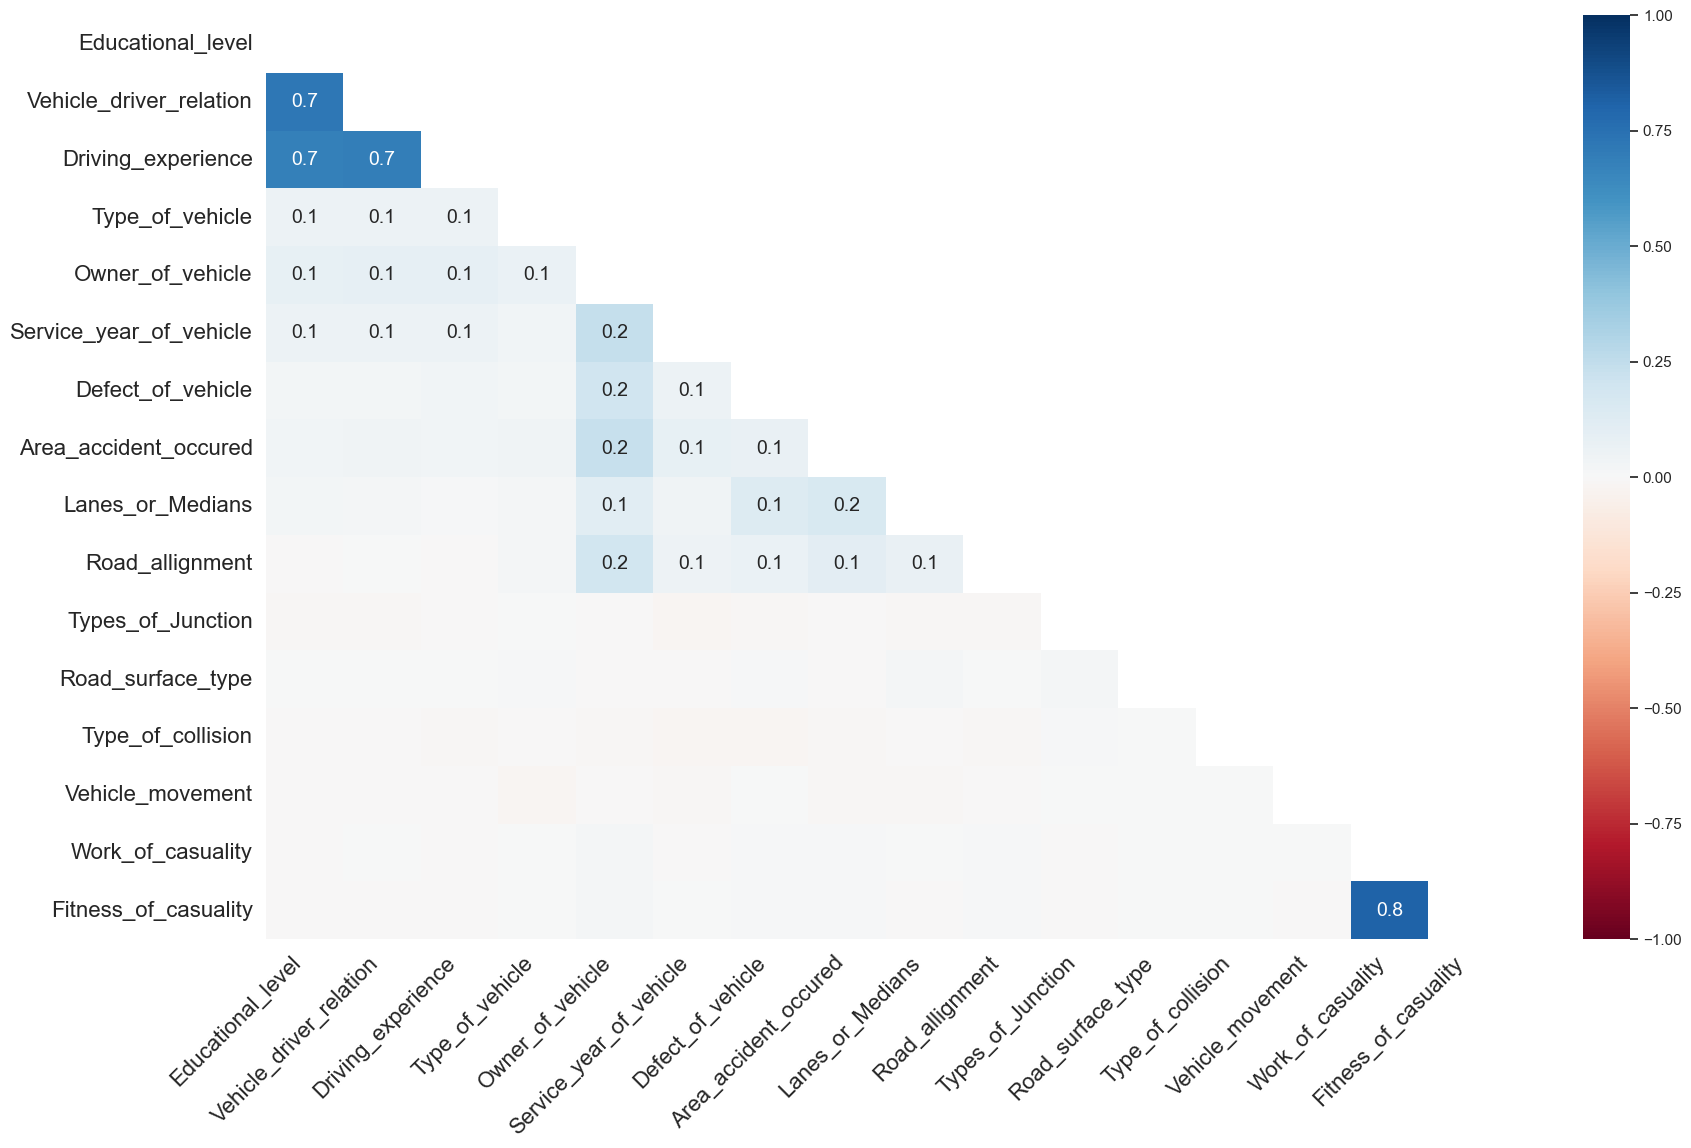

In [117]:
# the heatmap can show and quantify the correlation between missing data in columns
# might be better to just drop the two columns work_of_casualty and fitness_of_casualty
msno.heatmap(df)

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <h2 style="font-weight: bold; color: black;">Interesting questions we could try to ask ourselves:</h2>
    <p style="color: black;">- Is the accident severity related to the educational level/age or the gender? (For example, younger people could have a preceding reputation of being reckless drivers)</p>
    <p style="color: black;">- Could service year of the vehicle play a part? (Bad maintenance led to an accident?)</p>
    <p style="color: black;">You can see some interesting visualizations that show the relationship between the accident severity and various features down below:</p>
</div>


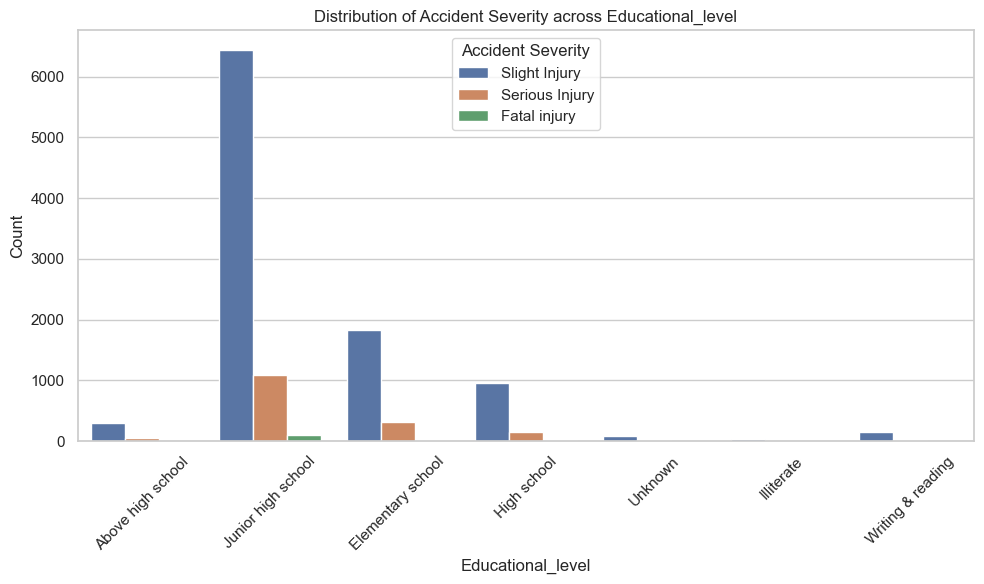

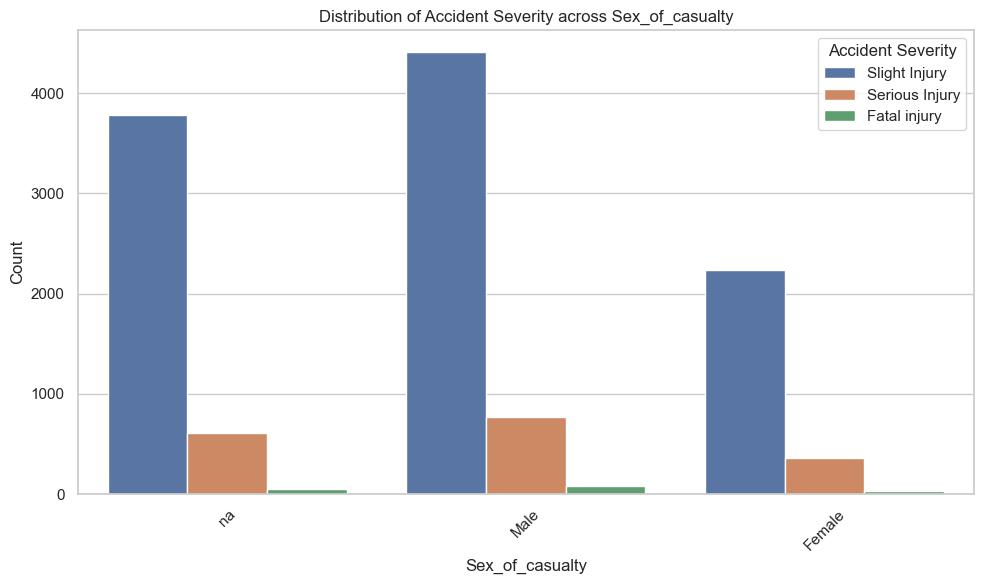

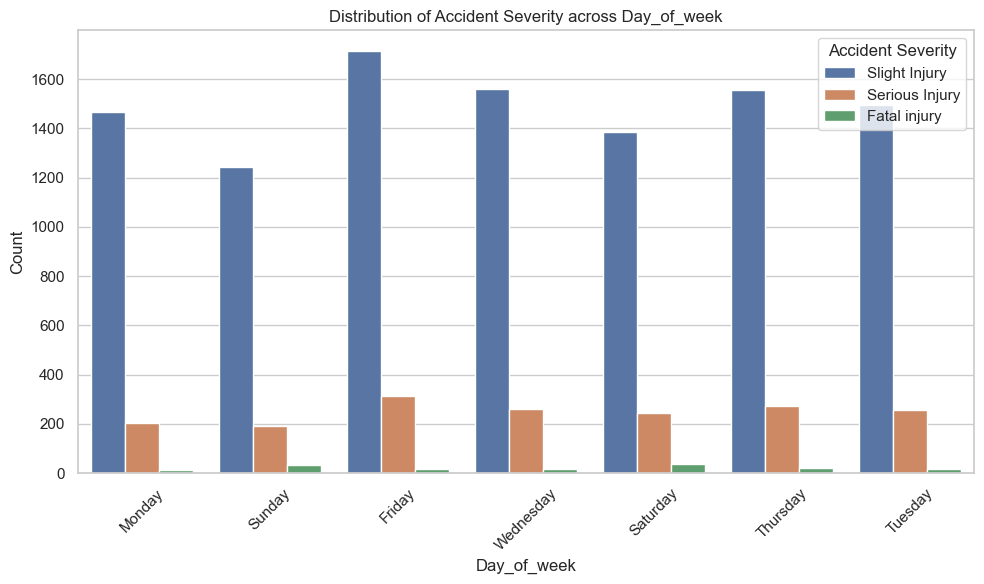

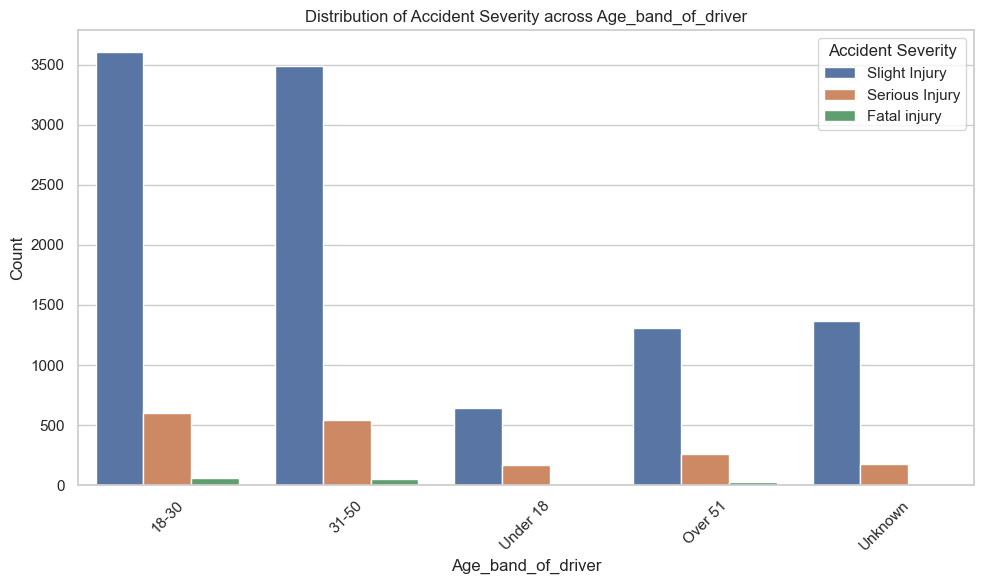

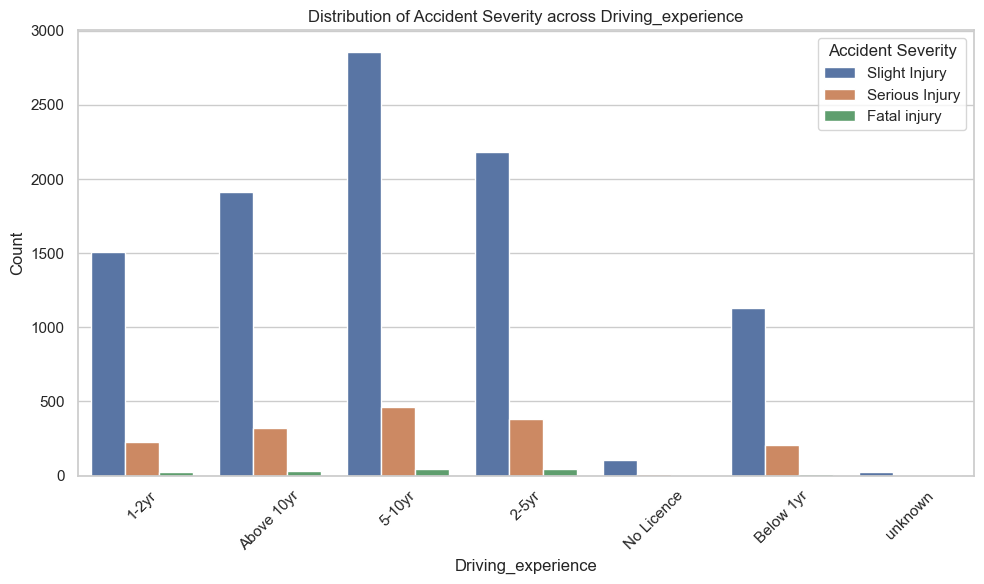

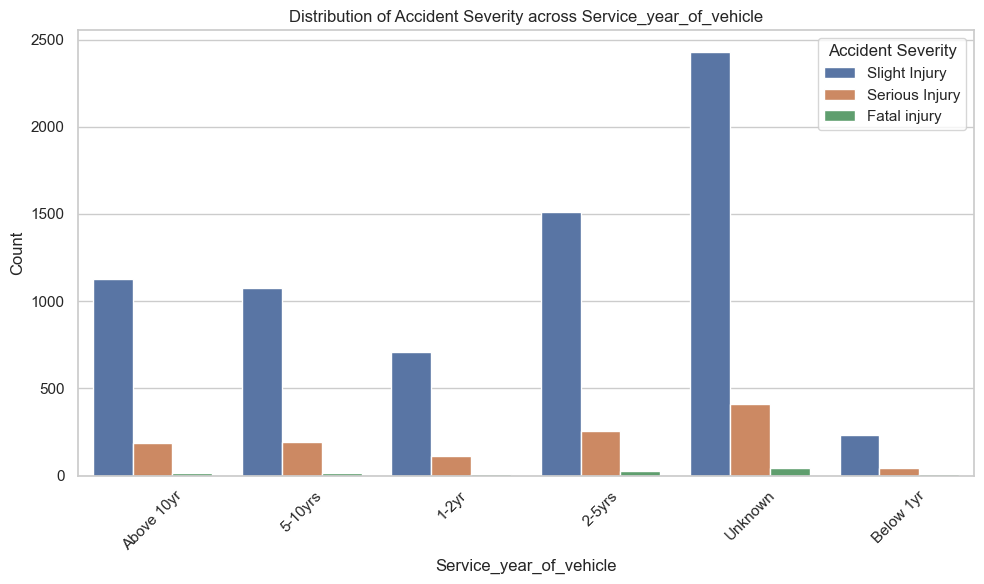

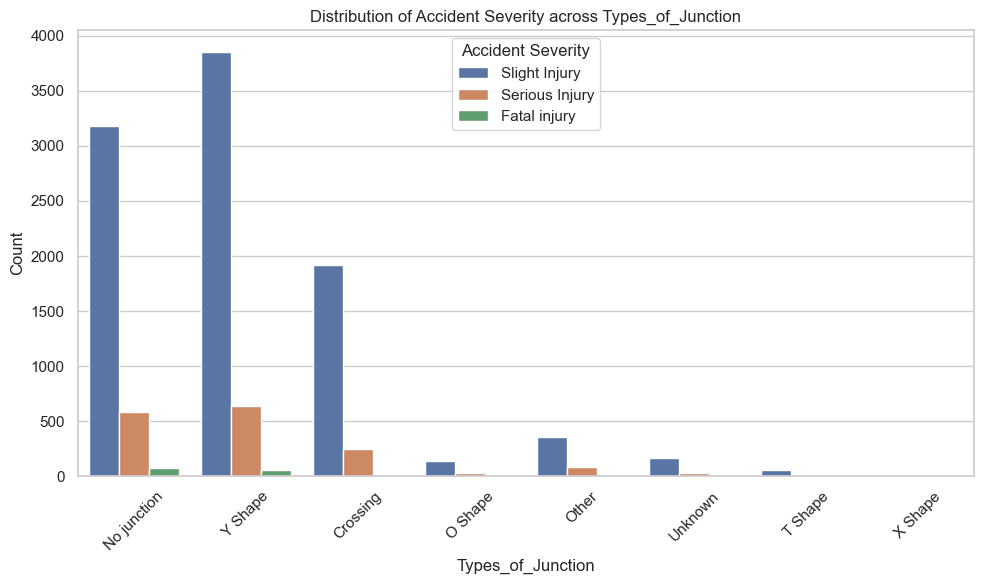

In [118]:
# Set the style of Seaborn
sns.set(style='whitegrid')

# Columns to visualize (replace these with the actual column names)
#columns_to_visualize = df.columns
columns_to_visualize = ['Educational_level', 'Sex_of_casualty', 'Day_of_week', 'Age_band_of_driver', 'Driving_experience', 'Service_year_of_vehicle', 'Types_of_Junction']


# Loop through columns and create bar charts
for col in columns_to_visualize:
    plt.figure(figsize=(10, 6))  # Adjust the figsize for smaller plots
    sns.countplot(x=col, hue='Accident_severity', data=df)
    plt.title(f'Distribution of Accident Severity across {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Accident Severity')
    plt.xticks(rotation=45)
    
    plt.tight_layout()





<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <h2 style="color: Black;">Talking Points</h1>
    <p style="color: black;">  </p>
    <p style="color: black;">Junior high school seems to be the educational level which is the most associated with accidents. </p>
    <p style="color: black;">No data to show that accidents are more likely to be fatal based on gender.  </p>
    <p style="color: black;">Most accidents are happening on Fridays.  </p>
    <p style="color: black;">People in the age group of 18-30 have the highest rate of accidents from this data set.   </p>
    <p style="color: black;">People with 5-10 years of experience driving represent the largest number of accidents.  </p>
    <p style="color: black;">The service year of the vehicle seems to show a low correlation for causing an accident.  </p>
    <p style="color: black;">Most accidents occur at Y-shaped junctions.   </p>
   
</div>

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <p style="color: black;">  </p>
    <p style="color: black;">Other Insights: </p>

In [119]:
pd.crosstab(df['Type_of_collision'],df['Accident_severity'])

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Type_of_collision,,,
Collision with animals,2,27,142
Collision with pedestrians,22,141,733
Collision with roadside objects,24,272,1490
Collision with roadside-parked vehicles,0,5,49
Fall from vehicles,0,4,30
Other,0,3,23
Rollover,4,54,339
Unknown,0,1,13
Vehicle with vehicle collision,104,1203,7467


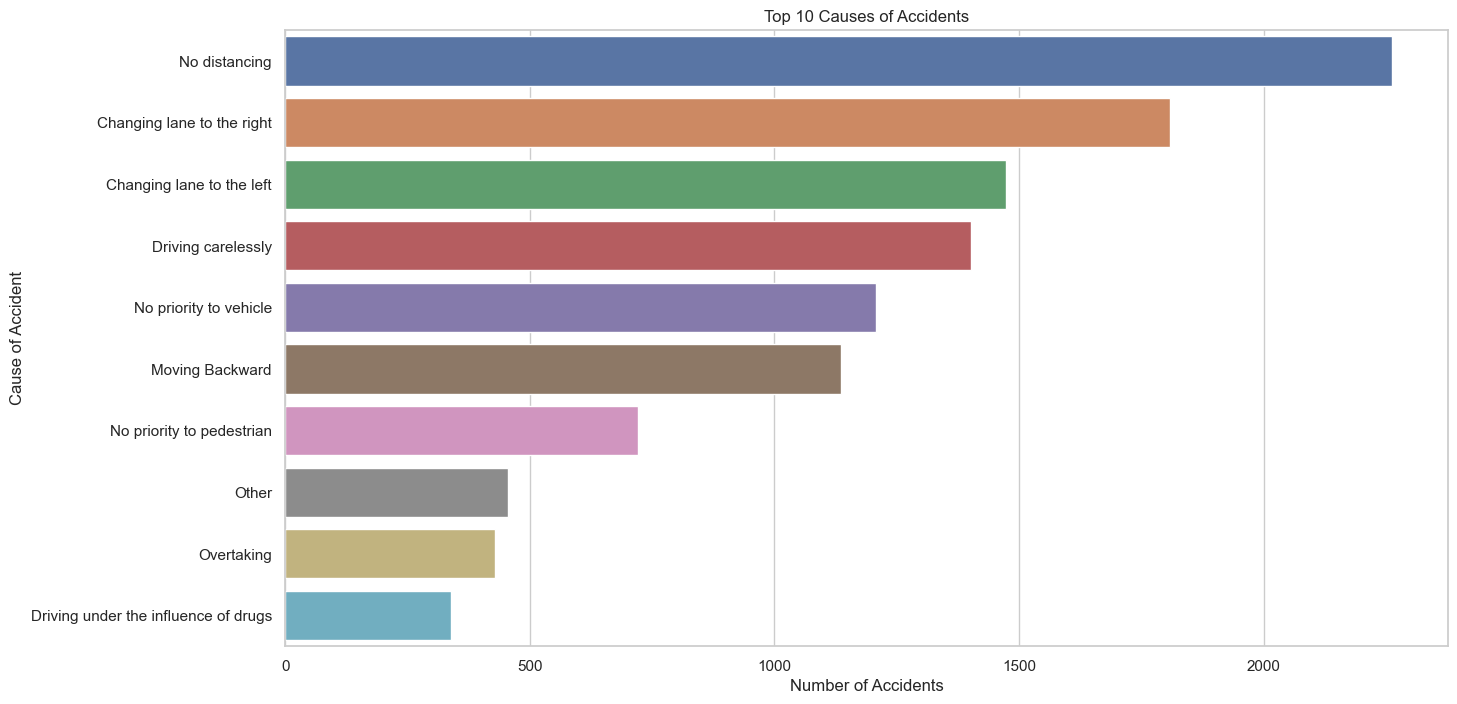

In [120]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the top 10 most frequent causes of accidents
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y='Cause_of_accident', order=df['Cause_of_accident'].value_counts().index[:10])
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause of Accident')
plt.show()




<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Preprocessing</h1>
</div>

In [121]:
# dropping columns with missing data
# note that missing data in fitness of casualty and work of casualty are highly correlated and then the other two columns have more than 30% of missing data 
# on a side note, there are some other columns whose missing data are correlated but they have less than 5% of data missing 
df = df.drop(['Fitness_of_casuality', 'Work_of_casuality', 'Defect_of_vehicle', 'Service_year_of_vehicle'], axis=1)

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <h5 style="font-weight: bold; color: blackbold; color: Black;">Encoding and Imputation:</h1>
</div>

In [122]:
# let's take a look at what columns are missing data again
df.isnull().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [123]:
# converting the time column to datetime 

df['Time'] = pd.to_datetime(df['Time'])

# date (day-month-year) time
df["Time"].dt.hour

# extracting hour and minute from timestamp
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df.drop('Time', axis=1, inplace=True)


# dealing with the time column 
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x
        
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

In [124]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,17,5
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,17,5
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17,5
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1,10
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,Undivided Two way,...,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury,16,15
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury,18,0
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury,13,55
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,Undivided Two way,...,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13,55


In [125]:
# we're going to split the data set first so that there's no kind of data leakage during the preprocessing steps

target_column = 'Accident_severity'

# Splitting features (X) and target variable (y)
X = df.drop(target_column, axis=1)  
y = df[target_column]  

# Split into training and temporary set (80% training, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temporary set into validation and testing sets (50% validation, 50% testing)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


##### Imputing

- since we're dealing with a lot of categorical values in the data set, let's impute the missing values with the mode as a baseline

In [126]:
#imputing with mode
columns_with_missing_data = X_train.columns[X_train.isna().any()]

for column in columns_with_missing_data:
    mode = X_train[column].mode()[0]
    X_train[column].fillna(mode, inplace = True)

columns_with_missing_data = X_test.columns[X_test.isna().any()]

for column in columns_with_missing_data:
    mode = X_test[column].mode()[0]
    X_test[column].fillna(mode, inplace = True)

columns_with_missing_data = X_val.columns[X_val.isna().any()]

for column in columns_with_missing_data:
    mode = X_val[column].mode()[0]
    X_val[column].fillna(mode, inplace = True)


In [127]:
# imputing results
X_train.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
hour                           0
minute                         0
dtype: int64

##### Encoding

- the first option that comes to mind for encoding categorical variables is one hot encoding
- however, let's first take a look at how many new columns will be created if we take this approach

In [128]:
# calculating the total number of unique variables in the data set 

columns = X_train.columns


extra_columns = 0
for column in columns:
    
    categories = len(X_train[column].unique())
    extra_columns += categories


print(f'extra_columns if we performed one hot encoding: {extra_columns}')

extra_columns if we performed one hot encoding: 233


- we will generate more than 200 columns of data if we proceed with one hot encoding (leads to high dimensionality)
- we have better options available like binary or label encoding

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <p style="color: black;">  </p>
    <p style="color: black;">- note that in our data set, some categorical features are ordinal ( Age_band_of_driver, Edcational_level) and some are nominal (Sex_of_driver, Type_of_junction) </p>
    <p style="color: black;">- we can try to use label encoding for the nominal features and ordinal encoding for ordinal features </p>


In [129]:
df.isnull().sum()

Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
hour                             0
minute              

In [130]:

label_encoders = {}

nominal_data_types = ['Sex_of_driver', 'Vehicle_driver_relation', 'Type_of_vehicle', 'Owner_of_vehicle', 
                        'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 
                        'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',    
                        'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 
                        'Sex_of_casualty', 'Pedestrian_movement', 'Cause_of_accident']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on your categorical column and transform it
for column in nominal_data_types:
    label_encoder = LabelEncoder()
    train_encoded = label_encoder.fit_transform(X_train[column])
    validation_encoded = label_encoder.transform(X_val[column])
    test_encoded = label_encoder.transform(X_test[column])
    
    # Save the fitted encoder to the dictionary
    label_encoders[column] = label_encoder

    X_train.drop(columns = column, inplace = True)
    X_val.drop(columns = column, inplace = True)
    X_test.drop(columns = column, inplace = True)
    X_train[column] = train_encoded
    X_val[column] = validation_encoded
    X_test[column] = test_encoded





In [131]:
# encoding the ordinal data 

ordinal_data = ['Day_of_week', 'Age_band_of_driver', 'Educational_level', 'Driving_experience','Light_conditions', 'Age_band_of_casualty', 'Casualty_severity', 'minute', 'hour']

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value= -1)

ordinal_encoders = {}

# Fit the encoder on your ordinal columns and transform them
for column in ordinal_data:
    ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    train_encoded = ordinal_encoder.fit_transform(X_train[column].values.reshape(-1, 1))
    validation_encoded = ordinal_encoder.transform(X_val[column].values.reshape(-1, 1))
    test_encoded = ordinal_encoder.transform(X_test[column].values.reshape(-1, 1))
    
    # Save the fitted encoder to the dictionary
    ordinal_encoders[column] = ordinal_encoder

    X_train.drop(columns = column, inplace = True)
    X_val.drop(columns = column, inplace = True)
    X_test.drop(columns = column, inplace = True)
    X_train[column] = train_encoded
    X_val[column] = validation_encoded
    X_test[column] = test_encoded
    

In [132]:
# encoding the target variables 

from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Slight Injury', 'Serious Injury', 'Fatal Injury']] , handle_unknown='use_encoded_value', unknown_value= -1)

encoded_target_train = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Replace the original target Series in y_train with the encoded values
y_train = pd.Series(encoded_target_train.flatten(), name='Accident_severity')

# Now, perform the same encoding on y_test
encoded_target_test = encoder.transform(y_test.values.reshape(-1, 1))
y_test = pd.Series(encoded_target_test.flatten(), name='Accident_severity')

# And also on y_val
encoded_target_val = encoder.transform(y_val.values.reshape(-1, 1))
y_val = pd.Series(encoded_target_val.flatten(), name='Accident_severity')

# Display the updated target Series for all sets
print("Updated y_train:")
print(y_train)

print("\nUpdated y_test:")
print(y_test)

print("\nUpdated y_val:")
print(y_val)


Updated y_train:
0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
8616    0.0
8617    0.0
8618    0.0
8619    0.0
8620    0.0
Name: Accident_severity, Length: 8621, dtype: float64

Updated y_test:
0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1843    1.0
1844    0.0
1845    0.0
1846    0.0
1847    0.0
Name: Accident_severity, Length: 1848, dtype: float64

Updated y_val:
0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1842    0.0
1843    0.0
1844    0.0
1845    1.0
1846    0.0
Name: Accident_severity, Length: 1847, dtype: float64


In [133]:
# note that we see everything is numeric now 
X_train

,Number_of_vehicles_involved,Number_of_casualties,Sex_of_driver,Vehicle_driver_relation,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,...,Cause_of_accident,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Light_conditions,Age_band_of_casualty,Casualty_severity,minute,hour
4759,2,1,1,0,0,3,7,4,5,1,...,0,6.0,1.0,2.0,0.0,3.0,1.0,2.0,4.0,7.0
5676,2,1,1,0,14,3,7,2,5,1,...,16,6.0,1.0,1.0,4.0,3.0,0.0,2.0,2.0,6.0
353,2,1,0,0,7,3,7,2,5,0,...,3,3.0,4.0,4.0,0.0,0.0,0.0,2.0,0.0,6.0
6223,2,1,1,0,9,3,7,4,5,7,...,1,2.0,1.0,4.0,2.0,0.0,0.0,2.0,6.0,4.0
456,4,6,1,0,0,1,2,2,5,0,...,12,5.0,3.0,2.0,1.0,3.0,1.0,2.0,6.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2,2,1,0,8,3,9,4,5,1,...,3,6.0,4.0,4.0,0.0,0.0,0.0,2.0,9.0,17.0
5191,2,1,1,0,0,3,2,4,5,0,...,0,6.0,1.0,1.0,1.0,3.0,1.0,2.0,4.0,17.0
5390,2,1,1,2,0,0,2,2,5,1,...,9,6.0,1.0,0.0,2.0,3.0,0.0,2.0,4.0,12.0
860,2,2,1,2,0,3,12,4,6,7,...,10,4.0,2.0,2.0,2.0,3.0,1.0,2.0,11.0,8.0


##### Upsampling using SMOTE
- since we're dealing with a highly imbalanced data set, we won't have enough data for the minority classes 
- upsampling using SMOTE helps us mitigate this problem
- note that this can lead to overfitting 

In [ ]:
# Class Balancing using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Baseline Modelling</h1>
</div>

In [ ]:
 
# let's take the baseline mode's accuracy to be around 83% which is when we predict the majority class all the time (you can see the visualizations a little ahead in the notebook)
# we'll be using some models to see how they compare to the baseline 

def modeling(X_train, y_train, X_val, y_val, **kwargs):
    scores = {}
    models = []
    precision = {}
    recall = {}
    f1 = {}
    bvd = {}

    # if 'xgb' in kwargs.keys() and kwargs['xgb']:
    #     xgb = XGBClassifier()
    #     xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
    #     y_pred = xgb.predict(X_test._get_numeric_data())
    #     scores['xgb']= [accuracy_score(y_test, y_pred)]
    #     models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        scores['rf']= [accuracy_score(y_val, y_pred)]
        precision['rf'] = [precision_score(y_val, y_pred, average='weighted')]
        recall['rf'] = [recall_score(y_val, y_pred, average='weighted')]
        f1['rf'] = f1_score(y_val, y_pred, average = 'weighted')

        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_val)
        precision['extree'] = [precision_score(y_val, y_pred, average='weighted')]
        recall['extree'] = [recall_score(y_val, y_pred, average='weighted')]
        f1['extree'] = f1_score(y_val, y_pred, average = 'weighted')
        models.append(extree)
        
    return scores, models, precision, recall, f1

In [ ]:
scores, models, precision, recall, f1 = modeling(X_train,y_train, X_test, y_test, rf=True, extree=True)


/Users/narengarapati/opt/anaconda3/envs/pysnowpark/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/narengarapati/opt/anaconda3/envs/pysnowpark/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f'precision_weighted: {precision}')
print(f'recall_weighted: {recall}')
print(f'F1: {f1}')

precision_weighted: {'rf': [0.7659667172654185], 'extree': [0.7637370351034836]}
recall_weighted: {'rf': [0.8257575757575758], 'extree': [0.8268398268398268]}
F1: {'rf': 0.7787720701642745, 'extree': 0.7742864176053831}


In [ ]:
print(f'accuracy: {scores}')

accuracy: {'rf': [0.8257575757575758]}


<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <p style="color: black;">  </p>
    <p style="color: black;">- the baseline models seem to be performing around the same 83% for accuracy and around 0.75 for the F1 score  </p>
    <p style="color: black;">- we will see visualizations for the baseline model down below </p>

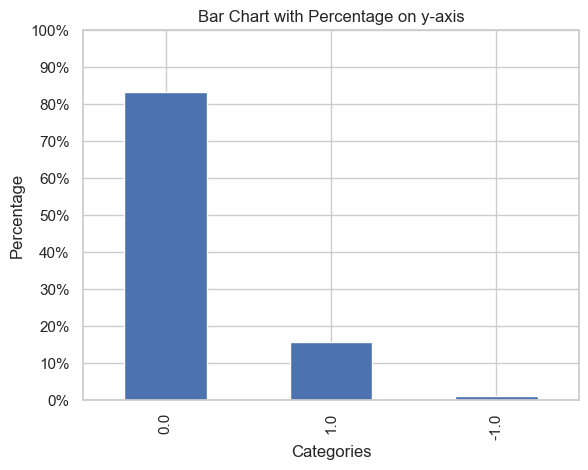

In [ ]:
import matplotlib.pyplot as plt

value_counts = y_test.value_counts(normalize=True) * 100  # Calculate percentages

ax = value_counts.plot(kind='bar')
plt.xlabel("Categories")
plt.ylabel("Percentage")
plt.title("Bar Chart with Percentage on y-axis")

# Set y-axis ticks and labels to represent percentages
ax.set_yticks(range(0, 101, 10))  # Adjust the range as needed
ax.set_yticklabels([f'{int(val)}%' for val in ax.get_yticks()])

plt.show()


In [ ]:
print(f'{(len(y_test.loc[y_test == 0]) * 100) / len(y_test)}% accuracy if we predicted the majority class (0) all the time')

83.27922077922078% accuracy if we predicted the majority class (0) all the time


<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <p style="color: black;">  </p>
    <h5 style="font-weight: bold; color: blackbold; color: Black;">Thoughts:</h1>
    <p style="color: black;">- the models seems to yield accuracies of around 83 percent which is almose the same to the baseline </p>
    <p style="color: black;">- the precision and recall scores are also very similar   </p>
    <p style="color: black;">- while this may seem pretty good at first glance, it is not great at all since we get a similar accuracy if we predict the majority class 100% of the time (i.e. it's barely performing better than the baseline model)</p>
    <p style="color: black;">- we can try to see how the model will perform after some hyperparameter tuning  </p>
    <p style="color: black;">- we can also try to use different imputation methods (like KNN umputation to see if that will help the model perform better) and SMOTE to upsample the minority class  </p>
    <p style="color: black;">- finally, accuracy is not the best metric to choose for classification tasks; precision and recall are arguably way more important along with the f1 score </p>


<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Hyperparamter Tuning</h1>
</div>

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <p style="color: black;">  </p>
    <p style="color: black;">- Note that hyperparameters are parameters that can't be learnt by the data  </p>
    <p style="color: black;">- We will have to vary them by ourselves to see at which values the model performs best using the validation set  </p>

In [ ]:
extree = ExtraTreesClassifier()
# we can see what the parameters are for an extra trees classifier model 
extree.get_params()


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:


gkf = KFold(n_splits=10, shuffle=True, random_state=42).split(X=X_val, y=y_val)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 5,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7606541672643949)

In [ ]:
gkf = KFold(n_splits=10, shuffle=True, random_state=42).split(X=X_val, y=y_val)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

rf = RandomForestClassifier()

gsearch = GridSearchCV(
    estimator= rf,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 5,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7606541672643949)

In [ ]:


def modeling_tuned(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    precision = {}
    recall = {}
    f1 = {}
    bvd = {}

    
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(ccp_alpha=0, criterion='gini', max_depth=15, min_samples_split=2, n_estimators=150)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        precision['rf'] = [precision_score(y_test, y_pred, average='weighted')]
        recall['rf'] = [recall_score(y_test, y_pred, average='weighted')]
        f1['rf'] = f1_score(y_test, y_pred, average = 'weighted')

        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier(ccp_alpha= 0, criterion= 'gini', max_depth=15, min_samples_split=2, n_estimators=150)
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        precision['extree'] = [precision_score(y_test, y_pred, average='weighted')]
        recall['extree'] = [recall_score(y_test, y_pred, average='weighted')]
        f1['extree'] = f1_score(y_test, y_pred, average = 'weighted')
        models.append(extree)
        
    return scores, models, precision, recall,  f1

In [ ]:
scores2, models, precision2, recall2, f12 = modeling_tuned(X_train,y_train, X_test, y_test, rf=True, extree=True)

### F1 Score

In [ ]:
print(f'tuned f1: {f12}') 
print(f'not tuned: {f1}')

tuned f1: {'rf': 0.7753553137933858, 'extree': 0.7633941893785012}
not tuned: {'rf': 0.7787720701642745, 'extree': 0.7742864176053831}


In [ ]:
print(f'tuned recall: {recall2}') 
print(f'not tuned: {recall}')

tuned recall: {'rf': [0.814935064935065], 'extree': [0.7949134199134199]}
not tuned: {'rf': [0.8257575757575758], 'extree': [0.8268398268398268]}


In [ ]:
print(f'tuned score: {scores2}') 
print(f'not tuned: {scores}')

tuned score: {'rf': [0.814935064935065]}
not tuned: {'rf': [0.8257575757575758]}


In [ ]:
print(f'tuned precision: {precision2}') 
print(f'not tuned: {precision}')

tuned precision: {'rf': [0.7565860201075949], 'extree': [0.7446637356963444]}
not tuned: {'rf': [0.7659667172654185], 'extree': [0.7637370351034836]}


##### Let's see the f1 score on the training set
- comparing the scores of the training and test sets can give insight into whether the model is overfitting/underfitting
- interesting note is that tree models are the most prone to be overfit 

In [ ]:
scores2, models, precision2, recall2, f1_train = modeling_tuned(X_train,y_train, X_train, y_train, rf=True, extree=True)

- if you look at the f1 scores, the models seem to be overfit to the training data 

In [ ]:
f1_train

{'rf': 0.9916647842978992, 'extree': 0.9865629537883057}

In [ ]:
scores2, models, precision2, recall2, f1_train = modeling(X_train,y_train, X_train, y_train, rf=True, extree=True)

In [ ]:
f1_train

{'rf': 1.0, 'extree': 1.0}

<div style="background-color: #FFDAA1; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Exporting the model to a file</h1>
</div>

In [ ]:

# we're going to use the joblib library to save the model to a file 
# this will be helpful in deploying the model 

# rf = RandomForestClassifier(ccp_alpha=0, criterion='gini', max_depth=15, min_samples_split=2, n_estimators=150)
# rf.fit(X_train, y_train) 

# dump(rf, 'rf_model.joblib')

['rf_model.joblib']

In [ ]:
# # we need to export the encoders as well 
# dump(label_encoders, 'label_encoders.joblib')
# dump(ordinal_encoders, 'ordinal_encoders.joblib')

['ordinal_encoders.joblib']